# Monte Carlo Simulation

## Introduction

In the model we will simulate the Ising Model for ferromagnetics.=

## Ising Model

## Monte Carlo

### Script

In [1]:
import numpy as np
import random
from random import choice
import time
from matplotlib import pyplot as plt

First we have to create our lattice were the elements are representing the spins of the electrons. We create a 2D array in which we assings the elements with +1. These represent spin up.
Because later on we will start with a low temperature, we expect the total magnetization to be maximal and the spins are aligned in +1 or -1 and as the temperature rises the spins will get to randomize. This is why we start with a grid of just ones.

In [2]:
def create_lattice(size):
    vector= np.ones(size**2)  #create vector to make the iteration easier
    return vector.reshape(size,size) 

In [3]:
A=create_lattice(2)
A

array([[1., 1.],
       [1., 1.]])

The Total energy of the system is of course calculated with the following Hamiltonian:
\begin{equation}H=-J \sum_{\langle i, j\rangle} S_{i} S_{j}\end{equation}
Where $\langle i, j\rangle$ are all the pairs of the nearest neigbour for each of the elements in the lattice. $S_i$ are the spins of the electrons.

In [4]:
def Hamiltonian(lattice):
    
    N=len(lattice)
    
    H=[]
    
    # next up, we only count the nearest neighours.
    
    for index, el in np.ndenumerate(lattice):
        
        i=index[0]
        j=index[1]
    
        left   = lattice[(i, j - 1)]
        right  = lattice[(i, (j + 1) % N)]
        up    = lattice[(i - 1, j)]
        down = lattice[((i + 1) % N, j)]
        
        nn=el*(up+down+left+right)
        
        H=np.append(H,nn)
        

    return -1/2*sum(H)

In [5]:
Hamiltonian(A)

-8.0

We also need a random 'flipper'. This function will at random choose a index and flip the spin of this element.

In [6]:
def flip_spin(lattice):
    U=np.copy(lattice)
    N=len(lattice[0,:])
    idx = (np.random.randint(N),np.random.randint(N))
    U[idx]*=-1
    return [U,idx]

Instead of calculating the energy of the whole matrix to see what is the energy difference. We can instead use the next trick since we only look at nearest neighbour interaction. This will save A LOT of computational time.

In [7]:
def dE(lattice, index):
    N=len(lattice)
    i=index[0]
    j=index[1]
    
    
    left   = lattice[(i, j - 1)]
    right  = lattice[(i, (j + 1) % N)]
    up    = lattice[(i - 1, j)]
    down = lattice[((i + 1) % N, j)]
    
    return -2*lattice[index]*(up+down+right+left)

In [8]:
dE(A,(0,0))

-8.0

In [9]:
Kb=1#8.6*10**(-5) #eV*K-1

def r(Ei, Ef, T):
    return np.exp(-(Ef-Ei)/(Kb*T))

This will calculate the "Boltzmann-factor-energy" when a spin is flipped.

In [10]:
def r2(DE, T):
    return np.exp(-(DE)/(Kb*T))

Another quantity we need is the magnetization of the lattice, the average and the varience.

In [11]:
def Magnetization(lattice):
    return abs(sum(sum(lattice)))

In [12]:
def average(lijst):
    return sum(lijst)/len(lijst)

def average_2(lijst):
    return sum(np.power(lijst,2))/len(lijst)

In [13]:
def algoritm(lattice, n0, nmax, T):
    U=np.copy(lattice)
    N=len(lattice[:,0])
    E_initial=Hamiltonian(U)

    E_i=np.copy(E_initial)
    
    n=0
    i=0
    
    M=np.zeros(nmax-n0+1)
    E=np.zeros(nmax-n0+1)
    
    while n <= nmax:
        flipper=flip_spin(U)
        hypotetical_lattice=flipper[0]
#         E_f=Hamiltonian(hypotetical_lattice)
        Delta_E=dE(hypotetical_lattice, flipper[1])

#         else:
            
        R= r2(Delta_E, T)
#         R=r(E_i,E_f,T)
        z=random.random()
 
            
        if R>z:
            U=hypotetical_lattice
#             E_i=E_f
            E_i+=Delta_E
                    
        
        if n >= n0:
                M[i]=Magnetization(U)
                E[i]=E_i
                i+=1
        n+=1
        
    ave_M=abs(average(M))
    ave_E=average(E)
    
    susc=(1/T)*(average_2(M)/(N**2)-ave_M**2/(N**2))
    spec_heat=(1/T**2)*(average_2(E)/(N**2)-ave_E**2/(N**2))
    
    return [ave_M/(N**2), ave_E/(N**2), susc, spec_heat, M,E,U]

Let's find the iterations needed for the thermic equilibrum

In [14]:
A=create_lattice(2)

In [15]:
A

array([[1., 1.],
       [1., 1.]])

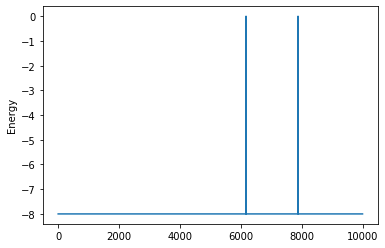

In [16]:
it=10000
x=np.arange(it)
y=algoritm(A,1,it,T=1)
plt.plot(x,y[-2])
plt.ylabel('Energy')
plt.show()


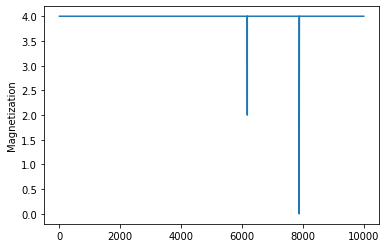

In [17]:
plt.plot(x,y[-3])
plt.ylabel('Magnetization')
plt.show()

In [18]:
A=create_lattice(32)

t1=time.time()
final=algoritm(A,10,10000,2.5)

t2=time.time()
t2-t1

0.3381311893463135

In [19]:
50*42/60

35.0

# Simulation

In [20]:
from IPython.display import clear_output
import timeit

In [21]:
def calculate(Temperature, A, n0, nmax):
    U=np.copy(A)
    
    M_vector=[]
    E_vector=[]
    X_vector=[]
    C_vector=[]

    i=0
    start= timeit.default_timer()
    
    for t in Temp:
        clear_output(wait=True)
        
        Average_M=[]
        Average_E=[]

        Average_X=[]
        Average_C=[]
        

        alg=algoritm(U,n0,nmax,t)

        Average_M=np.append(Average_M,alg[0])
        Average_E=np.append(Average_E,alg[1])

        Average_X=np.append(Average_X,alg[2])
        Average_C=np.append(Average_C,alg[3])


        
        M_vector=np.append(M_vector,average(Average_M))
        E_vector=np.append(E_vector,average(Average_E))

        X_vector=np.append(X_vector,average(Average_X))
        C_vector=np.append(C_vector,average(Average_C))
        U=alg[-1]
        
        i+=1
        
        stop= timeit.default_timer()
        if i/len(Temp)*100 <5:
            expected_time= "Calculating..."
        else:
            time_perc= timeit.default_timer()
            expected_time= np.round(( time_perc - start)/(i/(len(Temp)))/60, 2)
        
        print("Current progress", np.round(i/len(Temp)*100, 2),"%")
        print("Current run time:", np.round((stop-start)/60,2),"minutes")
        print("Expected run time", expected_time, "minutes")
        
    return [abs(M_vector), E_vector, X_vector, C_vector]

In [22]:
Temp=np.linspace(0.5,5,num=50)
A=create_lattice(2)
algoritm(A,10,100,2)

[0.8131868131868132,
 -1.4725274725274726,
 0.22690496316869946,
 0.7767177877067986,
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 2., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0.,
        2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4.]),
 array([-8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
        -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
        -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
        -8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -8.,
        -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
        -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,

In [31]:
t1=time.time()

A=create_lattice(2)
lattice_2=calculate(Temp, A, 100, 10000)

# M=create_world(4,1)
# lattice_4=calculate(Temp, M, 10, 10000)

# M=create_world(8,1)
# lattice_82=calculate(Temp, M, 1000, 10000)

# M=create_world(16,1)
# lattice_16=calculate(Temp, M, 1000, 100000)

# M=create_world(32,1)
# lattice_32=calculate(Temp, M, 1000, 100000)

t2=time.time()
t2-t1

Current progress 100.0 %
Current run time: 0.15 minutes
Expected run time 0.15 minutes


9.278695583343506

In [25]:
id=next(x[0] for x in enumerate(Temp) if x[1] > 2.27)
id

20

## Magnetization

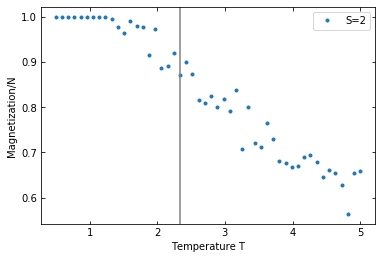

In [26]:
f = plt.figure()
ax = f.add_subplot(111)
ax.tick_params(axis="both", direction="in", top=True, right=True)

plt.plot(Temp,lattice_2[0],'.', label=('S=2'))
# plt.plot(Temp,lattice_4[0],'.', label=('S=4'))
# plt.plot(Temp,lattice_8[0],'.', label=('S=8'))
# plt.plot(Temp,lattice_82[0],'.', label=('S=8'))
# plt.plot(Temp,lattice_16[0],'.', label=('S=16'))
# plt.plot(Temp,lattice_32[0],'.', label=('S=32'))

plt.axvline(x=Temp[id],color='grey')

plt.xlabel('Temperature T')
plt.ylabel('Magnetization/N')
plt.legend()
plt.show()

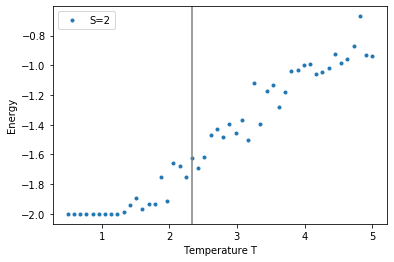

In [27]:
plt.plot(Temp,lattice_2[1],'.', label=('S=2'))
# plt.plot(Temp,lattice_4[1],'.', label=('S=4'))
# plt.plot(Temp,lattice_8[1],'.', label=('S=8'))
# plt.plot(Temp,lattice_16[1],'.', label=('S=16'))
# plt.plot(Temp,lattice_32[1],'.', label=('S=32'))

plt.axvline(x=Temp[id],color='grey')

plt.xlabel('Temperature T')
plt.ylabel('Energy')
plt.legend()
plt.show()

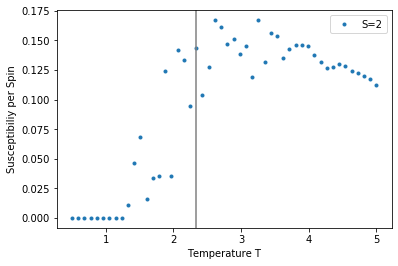

In [28]:
plt.plot(Temp,lattice_2[2],'.', label=('S=2'))
# plt.plot(Temp,lattice_4[2],'.', label=('S=4'))
# plt.plot(Temp,lattice_8[2],'.', label=('S=8'))

# plt.plot(Temp,lattice_16[2],'.', label=('S=16'))
# plt.plot(Temp,lattice_32[2],'.', label=('S=32'))

plt.axvline(x=Temp[id],color='grey')

plt.xlabel('Temperature T')
plt.ylabel('Susceptibiliy per Spin')
plt.legend()
plt.show()

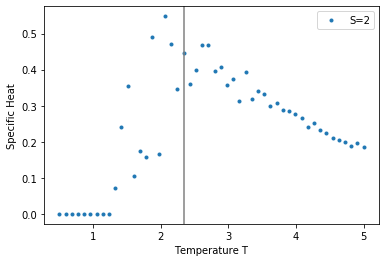

In [30]:
plt.plot(Temp,lattice_2[3],'.', label=('S=2'))
# plt.plot(Temp,lattice_4[3],'.', label=('S=4'))
# plt.plot(Temp,lattice_82[3],'.', label=('S=8'))
# plt.plot(Temp,lattice_16[3],'.', label=('S=16'))
# plt.plot(Temp,lattice_32[3],'.', label=('S=32'))
plt.axvline(x=Temp[id],color='grey')
plt.xlabel('Temperature T')
plt.ylabel('Specific Heat')
plt.legend()
plt.show()

In [ ]:
def Louve():
    create(horse)
    if fly==True:
        fly
    add birds

In [511]:
1500/60

25.0